In [1]:
"""
Python 3 function to convert rumour annotations into True, False, Unverified
"""

def convert_annotations(annotation, string = True):
    if 'misinformation' in annotation.keys() and 'true'in annotation.keys():
        if int(annotation['misinformation'])==0 and int(annotation['true'])==0:
            if string:
                label = "unverified"
            else:
                label = 2
        elif int(annotation['misinformation'])==0 and int(annotation['true'])==1 :
            if string:
                label = "true"
            else:
                label = 1
        elif int(annotation['misinformation'])==1 and int(annotation['true'])==0 :
            if string:
                label = "false"
            else:
                label = 0
        elif int(annotation['misinformation'])==1 and int(annotation['true'])==1:
            print ("OMG! They both are 1!")
            print(annotation['misinformation'])
            print(annotation['true'])
            label = None
            
    elif 'misinformation' in annotation.keys() and 'true' not in annotation.keys():
        # all instances have misinfo label but don't have true label
        if int(annotation['misinformation'])==0:
            if string:
                label = "unverified"
            else:
                label = 2
        elif int(annotation['misinformation'])==1:
            if string:
                label = "false"
            else:
                label = 0
                
    elif 'true' in annotation.keys() and 'misinformation' not in annotation.keys():
        #print ('Has true not misinformation')
        label = None
    else:
        #print('No annotations')
        label = None
           
    return label


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
import json


tweetSet='twitter16'
# Define the path to your text file
#file_path = './Data/twitter16/label.txt'
file_path = './Data/PHEME_veracity/all-rnr-annotated-threads/gurlitt-all-rnr-threads/rumours/536826643122503680/annotation.json'


# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a dictionary (hashtable) and add the key-value pairs
my_dict = {}
for key, value in data.items():
    my_dict[key] = value
    
print(my_dict['is_rumour'])
my_dict.keys
# # Initialize empty lists to store the data
# labels = []
# values = []

# # Read the file line by line and extract the data
# with open(file_path, 'r') as file:
#     for line in file:
#         line = line.strip()  # Remove any leading/trailing whitespace
#         label, value = line.split(':')  # Split the line into label and value
#         labels.append(label)
#         values.append(int(value))  # Convert the value to an integer

rumour


<function dict.keys>

In [3]:
convert_annotations(my_dict)

'true'

In [7]:
import os
# Create a DataFrame from the lists
df = pd.DataFrame(columns=['TweetID', 'IsRumour', 'IsTrue','Path'])
df
count=0
Incidentdirectory = './Data/PHEME_veracity/all-rnr-annotated-threads/'
for subdirectoryIncident in os.listdir(Incidentdirectory):
    subdirectoryIncident_path = os.path.join(Incidentdirectory, subdirectoryIncident)
    if os.path.isdir(subdirectoryIncident_path):
        rmourOrnonrumour=['rumours','non-rumours']
        for rumourLabel in rmourOrnonrumour:
            directory =subdirectoryIncident_path+'/'+rumourLabel
            #directory = './Data/PHEME_veracity/all-rnr-annotated-threads/ottawashooting-all-rnr-threads/'+rumourLabel
            for subdirectory in os.listdir(directory):
                    subdirectory_path = os.path.join(directory, subdirectory)
                    if os.path.isdir(subdirectory_path):
                        count=count+1
                        #print("Subdirectory: ",count, subdirectory_path )
                        # Open and read the JSON file
                        file_path=subdirectory_path+'/annotation.json'
                        with open(file_path, 'r') as file:
                            data = json.load(file)
                            my_dict = {}
                            for key, value in data.items():
                                my_dict[key] = value
                            #print(convert_annotations(my_dict))
                            # Create a dictionary with the data for the new row
                            new_row_data = {
                                'TweetID': subdirectory,
                                'IsRumour':  my_dict['is_rumour'],
                                'IsTrue':convert_annotations(my_dict) ,#'true' if my_dict['is_rumour']=='nonrumour' else convert_annotations(my_dict) ,
                                'Path':subdirectory_path
                            }
                            # Convert the dictionary to a DataFrame
                            new_row_df = pd.DataFrame(new_row_data, index=[0])
                            # Concatenate the new row DataFrame with the original DataFrame
                            df = pd.concat([df, new_row_df], ignore_index=True)
df

,TweetID,IsRumour,IsTrue,Path
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
...,...,...,...,...
6420,544521260840267776,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...
6421,544521433473634304,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...
6422,544521788777304064,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...
6423,544521880661950464,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...


In [8]:
# Get the value counts of 'IsTrue'
value_counts = df['IsTrue'].value_counts()

print("Value Counts of 'IsTrue':")
print(value_counts)

Value Counts of 'IsTrue':
true          1067
unverified     697
false          638
Name: IsTrue, dtype: int64


In [9]:
df[df['IsTrue'].isin(['true','false'])]['IsTrue'].unique()
df[df['IsTrue'].isin(['true','false'])]['IsTrue'].value_counts()
df=df[df['IsTrue'].isin(['true','false'])]
df = df.reset_index(drop=True)
df

,TweetID,IsRumour,IsTrue,Path
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
...,...,...,...,...
1700,544520273718812672,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
1701,544520654431981568,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
1702,544520932405284864,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
1703,544521141335764992,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...


In [10]:
df.iloc[0]['Path']

'./Data/PHEME_veracity/all-rnr-annotated-threads/charliehebdo-all-rnr-threads/rumours\\552783238415265792'

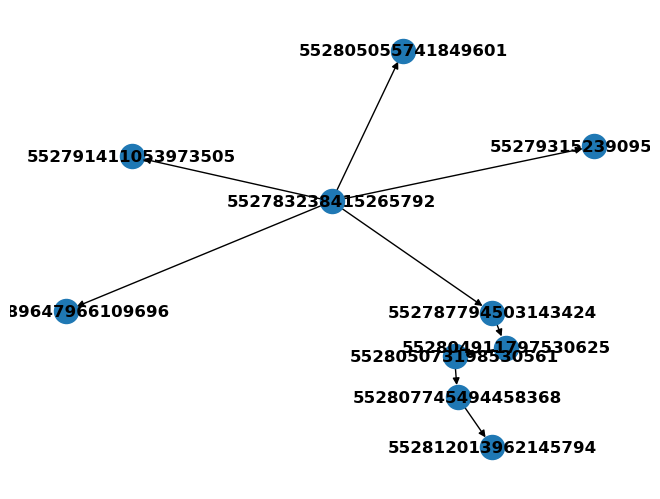

In [11]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Your JSON data
json_data = '{"552783238415265792":{"552787794503143424":{"552804911797530625":{"552805073198530561":{"552807745494458368":{"552812013962145794":[]}}}},"552789647966109696":[],"552791411053973505":[],"552793152390955009":[],"552805055741849601":[]}}'

# Convert JSON data to a dictionary
data_dict = json.loads(json_data)

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes and edges to the graph
def add_nodes_and_edges(graph, data, parent=None):
    for node, children in data.items():
        graph.add_node(node)
        if parent is not None:
            graph.add_edge(parent, node)
        if isinstance(children, list):
            for child in children:
                graph.add_node(child)
                graph.add_edge(node, child)
        elif isinstance(children, dict):
            add_nodes_and_edges(graph, children, node)

# # Example usage:
# g = Graph(num_vertices+1)

# Populate the graph
add_nodes_and_edges(G, data_dict)

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
plt.show()


In [12]:
df['MaxLength']=0
encoding = 'utf-8'
# df
# # Iterate through the DataFrame and add edges to the graph
for index, row in df.iterrows(): # df[:1000].iterrows():
    G = nx.DiGraph()
#     df.iloc[0]['Path']+'/structure.json'    
    fileName=df.iloc[index]['Path']+'/structure.json'
#     print(fileName)
    with open(fileName, 'r', encoding=encoding) as file:
        data = json.load(file)
    # data_dict = json.loads(fileName)
    # data
    # data_dict = json.loads(data)
    add_nodes_and_edges(G, data)
    
    df.loc[index,'MaxLength']=len(nx.dag_longest_path(G))
df


,TweetID,IsRumour,IsTrue,Path,MaxLength
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,6
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,4
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,11
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,6
...,...,...,...,...,...
1700,544520273718812672,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,4
1701,544520654431981568,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,1
1702,544520932405284864,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,15
1703,544521141335764992,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,3


In [13]:
df_sorted = df.sort_values(by='MaxLength', ascending=False)
df_sorted.head(10)

,TweetID,IsRumour,IsTrue,Path,MaxLength
336,500371231183745025,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,26
1449,544341194822520832,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
1332,544288661253398528,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
37,552793552376569857,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
119,552993818816299008,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
1305,544282877278814208,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
360,580320890086383616,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
43,552795773180858368,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
1605,544430771688439808,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
115,552985855854661633,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,19


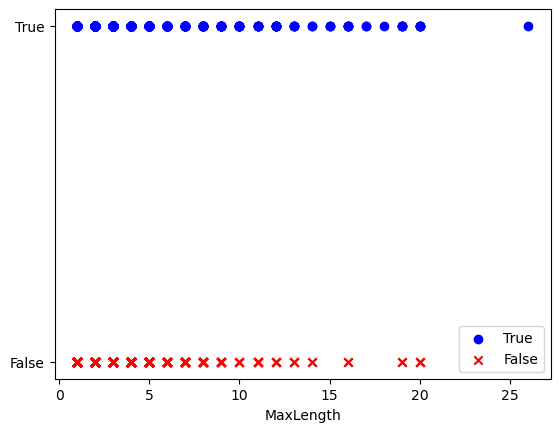

In [14]:
# Separate the DataFrame based on 'IsTrue' values
true_values = df[df['IsTrue']=='true']
false_values = df[df['IsTrue']=='false']

# Create a scatter plot
plt.scatter(true_values['MaxLength'], [1] * len(true_values), color='blue', label='True', marker='o')
plt.scatter(false_values['MaxLength'], [0] * len(false_values), color='red', label='False', marker='x')

# Set plot labels and legend
plt.xlabel('MaxLength')
plt.yticks([0, 1], ['False', 'True'])
plt.legend()

# Show the plot
plt.show()
# In this example:

# true_values and false_values are subsets of the original DataFrame based on the 'IsTrue' column.
# Two separate scatter plots are created for True and False values using the scatter function.
# The color parameter is used to specify the colors for True and False.
# The y-axis ticks and labels are adjusted to represent 'False' and 'True'.
# The legend() function is used to display the legend.
# Adjust the column names and data as needed for your specific DataFrame.







In [15]:
df_sorted = df.sort_values(by='MaxLength', ascending=False)
df_sorted.head(10)

,TweetID,IsRumour,IsTrue,Path,MaxLength
336,500371231183745025,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,26
1449,544341194822520832,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
1332,544288661253398528,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
37,552793552376569857,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
119,552993818816299008,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
1305,544282877278814208,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
360,580320890086383616,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
43,552795773180858368,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
1605,544430771688439808,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,20
115,552985855854661633,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,19


In [16]:
# df.iloc[336]['Path']
# pd.set_option('display.max_colwidth', 50)  # You can adjust the value as needed


In [17]:
# # Set the option to display the complete string without truncation
# pd.set_option('display.max_colwidth', None)

print(df[df['TweetID']=='500371231183745025']['Path'])

336    ./Data/PHEME_veracity/all-rnr-annotated-threads/ferguson-all-rnr-threads/rumours\500371231183745025
Name: Path, dtype: object


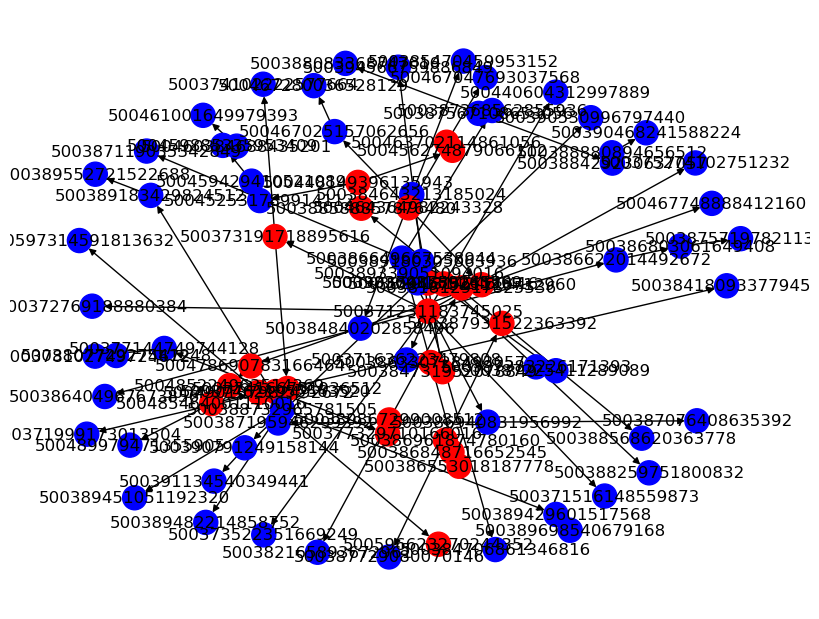

In [18]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Your JSON data
json_data = '{"500371231183745025":{"500371516148559873":[],"500371636223479808":{"500371999173013504":[],"500384180933779457":[]},"500372769188880384":[],"500373191718895616":{"500374102222577664":[],"500374166751936512":{"500374621955563520":{"500377144749744128":{"500378102749724672":{"500380772927541248":[]}},"500377329710166016":{"500380867299008512":{"500381812917825536":{"500382913142460416":{"500383641789165569":{"500384643213185024":{"500384840202858496":{"500386404967673856":[],"500386622014492672":{"500386803061649408":{"500387571978211330":[]}}},"500385470459953152":[]},"500384731952078849":{"500386330728493057":{"500386553018187778":{"500386848716652545":{"500386961874780160":{"500387729080070146":[],"500387931522363392":{"500388568620363778":[],"500388588857876480":{"500448149396135943":{"500452531789914112":{"500459429410521089":{"500459885335953409":{"500460384688435201":{"500461001649979393":[]}}}},"500456274879066112":{"500463702114861056":{"500464364982243328":{"500467025157062656":{"500467280036528129":[]},"500467521116712960":{"500467748888412160":[],"500478690783166464":{"500485224963514369":{"500485464001110016":{"500489979471355905":[],"500490137982492672":{"500596623270244352":[],"500597314591813632":[]}}}}}},"500467047693037568":[]}}}}}}}},"500386649667538944":{"500386940831956992":{"500387076408635392":[],"500387195946299392":{"500388732965781505":{"500389183429824512":{"500389552721522688":[]},"500389429601517568":{"500389698540679168":[]},"500389451051192320":[],"500389482214858752":[]}}},"500387119035342849":[],"500387225411289089":{"500387383226171393":{"500388259751800832":[],"500389180305063936":{"500389339051094016":{"500390379855024129":{"500390530996797440":[],"500390791249158144":{"500391134540349441":[]}}}}}},"500387368562855936":{"500387567108653056":{"500388083368747010":[],"500388429230637057":{"500388880894656512":{"500390468241588224":[]}}}}}}}}}},"500382165893672961":[]}}}}},"500373522351669249":[],"500375274102751232":[],"500384706861346816":[],"500394566759886849":[],"500440604312997889":[]}}'
# Convert JSON data to a dictionary
data_dict = json.loads(json_data)

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes and edges to the graph
def add_nodes_and_edges(graph, data, parent=None):
    for node, children in data.items():
        graph.add_node(node)
        if parent is not None:
            graph.add_edge(parent, node)
        if isinstance(children, list):
            for child in children:
                graph.add_node(child)
                graph.add_edge(node, child)
        elif isinstance(children, dict):
            add_nodes_and_edges(graph, children, node)

# # Example usage:
# g = Graph(num_vertices+1)

# Populate the graph
add_nodes_and_edges(G, data_dict)

# # Visualize the graph
# pos = nx.spring_layout(G)
# #nx.draw(G, pos, with_labels=True, font_weight='bold')
# # Set the width of the edges (adjust the value as needed)
# edge_width = 2.0
# # Set the desired figure width and height
# figure_width = 8  # Adjust this value as needed
# figure_height = 6  # Adjust this value as needed

# # Create a figure with the specified size
# plt.figure(figsize=(figure_width, figure_height))
# # Draw the graph with specified edge width
# nx.draw(G, with_labels=True, width=edge_width)
# plt.show()

# Find the longest path in the graph
longest_path = nx.dag_longest_path(G)

# Set colors for the nodes on the longest path
node_colors = ['red' if node in longest_path else 'blue' for node in G.nodes]

# Visualize the graph with node colors
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors)
# Remove labels for nodes not on the longest path
labels = {}
for node in G.nodes:
    if node not in longest_path:
        #print(str(labels[node]))
        labels[node] = ''
nx.draw_networkx_labels(G, pos, labels)

plt.show()


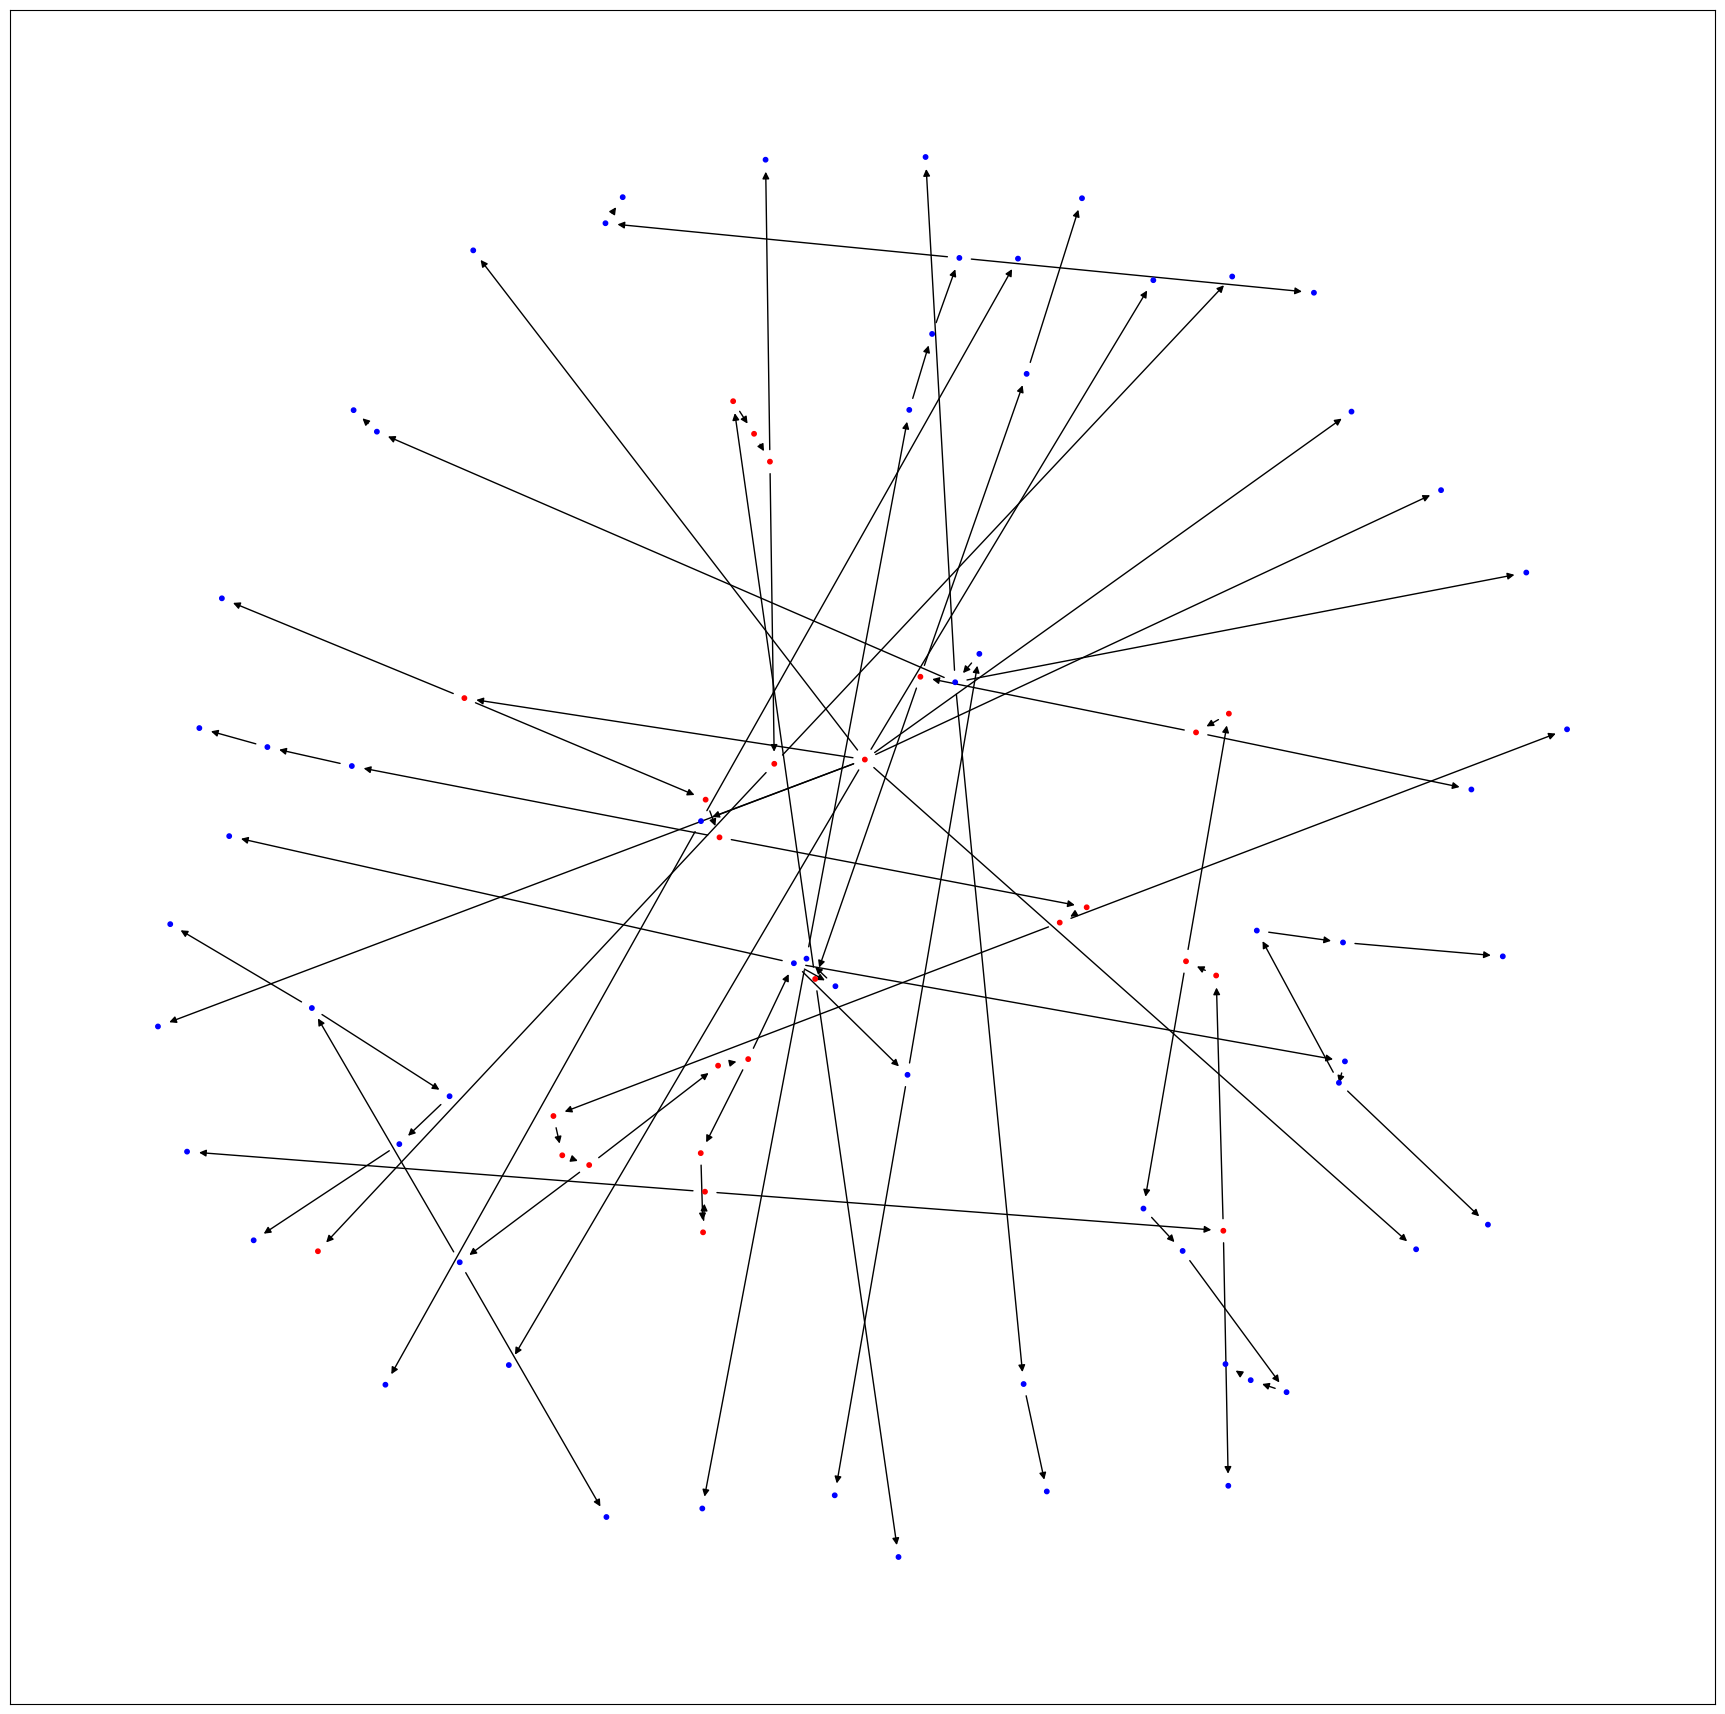

In [23]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Your JSON data
json_data = '{"500371231183745025":{"500371516148559873":[],"500371636223479808":{"500371999173013504":[],"500384180933779457":[]},"500372769188880384":[],"500373191718895616":{"500374102222577664":[],"500374166751936512":{"500374621955563520":{"500377144749744128":{"500378102749724672":{"500380772927541248":[]}},"500377329710166016":{"500380867299008512":{"500381812917825536":{"500382913142460416":{"500383641789165569":{"500384643213185024":{"500384840202858496":{"500386404967673856":[],"500386622014492672":{"500386803061649408":{"500387571978211330":[]}}},"500385470459953152":[]},"500384731952078849":{"500386330728493057":{"500386553018187778":{"500386848716652545":{"500386961874780160":{"500387729080070146":[],"500387931522363392":{"500388568620363778":[],"500388588857876480":{"500448149396135943":{"500452531789914112":{"500459429410521089":{"500459885335953409":{"500460384688435201":{"500461001649979393":[]}}}},"500456274879066112":{"500463702114861056":{"500464364982243328":{"500467025157062656":{"500467280036528129":[]},"500467521116712960":{"500467748888412160":[],"500478690783166464":{"500485224963514369":{"500485464001110016":{"500489979471355905":[],"500490137982492672":{"500596623270244352":[],"500597314591813632":[]}}}}}},"500467047693037568":[]}}}}}}}},"500386649667538944":{"500386940831956992":{"500387076408635392":[],"500387195946299392":{"500388732965781505":{"500389183429824512":{"500389552721522688":[]},"500389429601517568":{"500389698540679168":[]},"500389451051192320":[],"500389482214858752":[]}}},"500387119035342849":[],"500387225411289089":{"500387383226171393":{"500388259751800832":[],"500389180305063936":{"500389339051094016":{"500390379855024129":{"500390530996797440":[],"500390791249158144":{"500391134540349441":[]}}}}}},"500387368562855936":{"500387567108653056":{"500388083368747010":[],"500388429230637057":{"500388880894656512":{"500390468241588224":[]}}}}}}}}}},"500382165893672961":[]}}}}},"500373522351669249":[],"500375274102751232":[],"500384706861346816":[],"500394566759886849":[],"500440604312997889":[]}}'
# Convert JSON data to a dictionary
data_dict = json.loads(json_data)

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes and edges to the graph
def add_nodes_and_edges(graph, data, parent=None):
    for node, children in data.items():
        graph.add_node(node)
        if parent is not None:
            graph.add_edge(parent, node)
        if isinstance(children, list):
            for child in children:
                graph.add_node(child)
                graph.add_edge(node, child)
        elif isinstance(children, dict):
            add_nodes_and_edges(graph, children, node)

# Populate the graph
add_nodes_and_edges(G, data_dict)

# Find the longest path in the graph
longest_path = nx.dag_longest_path(G)

# Set colors for the nodes on the longest path
node_colors = ['red' if node in longest_path else 'blue' for node in G.nodes]

# Visualize the graph with node colors and labels for nodes on the longest path
pos = nx.spring_layout(G)
plt.figure(figsize=(22, 22))



# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=10,node_color=node_colors)
nx.draw_networkx_edges(G, pos)

# Draw labels for nodes on the longest path
#labels = {node: node if node in longest_path else '' for node in G.nodes}
labels = {node: '' if node in longest_path else '' for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels)

plt.show()


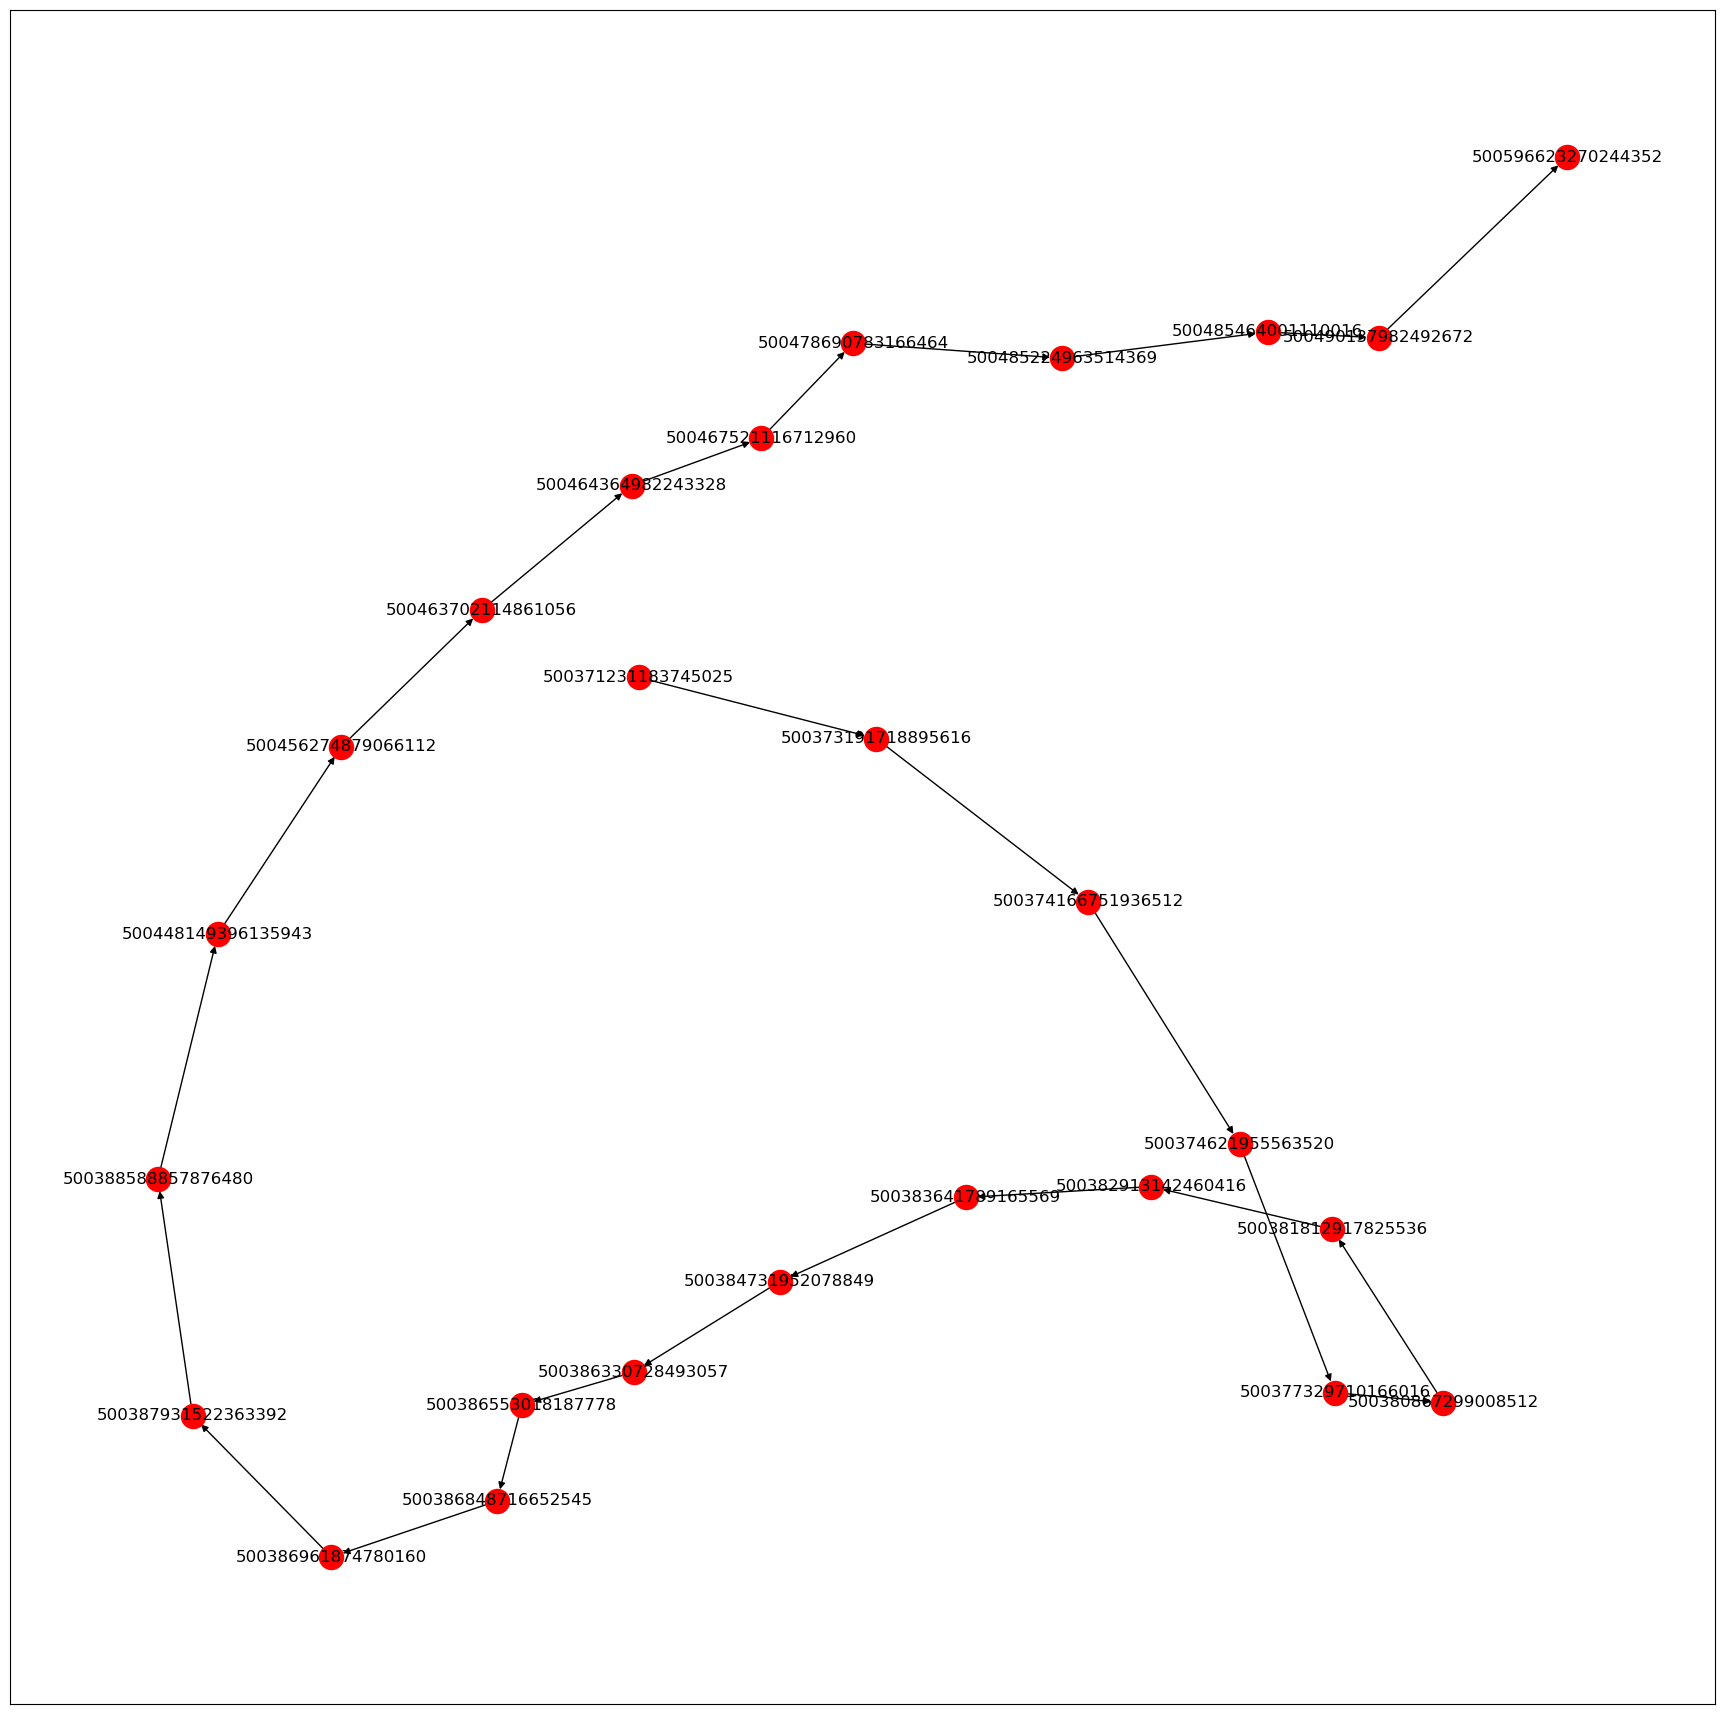

In [22]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Your JSON data
json_data = '{"500371231183745025":{"500371516148559873":[],"500371636223479808":{"500371999173013504":[],"500384180933779457":[]},"500372769188880384":[],"500373191718895616":{"500374102222577664":[],"500374166751936512":{"500374621955563520":{"500377144749744128":{"500378102749724672":{"500380772927541248":[]}},"500377329710166016":{"500380867299008512":{"500381812917825536":{"500382913142460416":{"500383641789165569":{"500384643213185024":{"500384840202858496":{"500386404967673856":[],"500386622014492672":{"500386803061649408":{"500387571978211330":[]}}},"500385470459953152":[]},"500384731952078849":{"500386330728493057":{"500386553018187778":{"500386848716652545":{"500386961874780160":{"500387729080070146":[],"500387931522363392":{"500388568620363778":[],"500388588857876480":{"500448149396135943":{"500452531789914112":{"500459429410521089":{"500459885335953409":{"500460384688435201":{"500461001649979393":[]}}}},"500456274879066112":{"500463702114861056":{"500464364982243328":{"500467025157062656":{"500467280036528129":[]},"500467521116712960":{"500467748888412160":[],"500478690783166464":{"500485224963514369":{"500485464001110016":{"500489979471355905":[],"500490137982492672":{"500596623270244352":[],"500597314591813632":[]}}}}}},"500467047693037568":[]}}}}}}}},"500386649667538944":{"500386940831956992":{"500387076408635392":[],"500387195946299392":{"500388732965781505":{"500389183429824512":{"500389552721522688":[]},"500389429601517568":{"500389698540679168":[]},"500389451051192320":[],"500389482214858752":[]}}},"500387119035342849":[],"500387225411289089":{"500387383226171393":{"500388259751800832":[],"500389180305063936":{"500389339051094016":{"500390379855024129":{"500390530996797440":[],"500390791249158144":{"500391134540349441":[]}}}}}},"500387368562855936":{"500387567108653056":{"500388083368747010":[],"500388429230637057":{"500388880894656512":{"500390468241588224":[]}}}}}}}}}},"500382165893672961":[]}}}}},"500373522351669249":[],"500375274102751232":[],"500384706861346816":[],"500394566759886849":[],"500440604312997889":[]}}'
# Convert JSON data to a dictionary
data_dict = json.loads(json_data)

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes and edges to the graph
def add_nodes_and_edges(graph, data, parent=None):
    for node, children in data.items():
        graph.add_node(node)
        if parent is not None:
            graph.add_edge(parent, node)
        if isinstance(children, list):
            for child in children:
                graph.add_node(child)
                graph.add_edge(node, child)
        elif isinstance(children, dict):
            add_nodes_and_edges(graph, children, node)

# Populate the graph
add_nodes_and_edges(G, data_dict)

# Find the longest path in the graph
longest_path = nx.dag_longest_path(G)

# Create a subgraph containing only nodes on the longest path
subgraph = G.subgraph(longest_path)

# Visualize the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(22, 22))

# Draw nodes and edges
nx.draw_networkx_nodes(subgraph, pos, node_size=300, node_color='red')
nx.draw_networkx_edges(subgraph, pos)

# Draw labels for nodes on the longest path
labels = {node: node for node in longest_path}
nx.draw_networkx_labels(subgraph, pos, labels)

plt.show()
